In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

%matplotlib inline
sns.set_style('dark')

In [2]:
df = pd.read_csv('../data/travel_insurance.csv')

In [17]:
data = df.copy()

In [3]:
ProfileReport(df, title='travel_insurance_report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import numpy as np

In [8]:
df = df.loc[(df['Age'] <= 100) & (df['Net Sales'] > 0) & (df['Duration'] <= 365) & (df['Duration'] >= 0), :]

df['claim_count'] = df['Claim'].apply(lambda x: np.where(x == 'Yes', 1, 0))


In [9]:
df.shape

(58525, 12)

In [10]:
product_mapping = {
    '1 way Comprehensive Plan': 'comprehensive',
    '2 way Comprehensive Plan': 'comprehensive',
    '24 Protect': 'cancellation',
    'Annual Gold Plan': 'amt',
    'Annual Silver Plan': 'amt',
    'Annual Travel Protect Gold': 'amt',
    'Annual Travel Protect Platinum': 'amt',
    'Annual Travel Protect Silver': 'amt',
    'Basic Plan': 'standard',
    'Bronze Plan': 'standard',
    'Cancellation Plan': 'cancellation',
    'Child Comprehensive Plan': 'comprehensive',
    'Comprehensive Plan': 'comprehensive',
    'Gold Plan': 'comprehensive',
    'Individual Comprehensive Plan': 'comprehensive',
    'Premier Plan': 'comprehensive',
    'Rental Vehicle Excess Insurance': 'rental',
    'Silver Plan': 'standard',
    'Single Trip Travel Protect Gold': 'comprehensive',
    'Single Trip Travel Protect Platinum': 'comprehensive',
    'Single Trip Travel Protect Silver': 'standard',
    'Spouse or Parents Comprehensive Plan': 'comprehensive',
    'Ticket Protector': 'cancellation',
    'Travel Cruise Protect': 'cancellation',
    'Value Plan': 'standard'
}

df['product_mapped'] = df['Product Name'].apply(lambda x: product_mapping[x])


In [11]:
# duration binning

df['duration_bin'] = pd.cut(df['Duration'], bins=10)
df['duration_bin'] = df['duration_bin'].apply(lambda x: str(x))

In [12]:
# destination grouping

top_countries = (
    df['Destination'].value_counts().head(20)
    .index
    .tolist()
)

df['destination_band'] = df['Destination'].apply(lambda x: np.where(x in top_countries, x, 'OTHER'))

In [13]:
one_way = df.groupby(['Product Name']).agg(
    {
        'claim_count': 'sum',
        'Claim': 'count'
    }
)

one_way['claim_freq'] = one_way['claim_count'] / one_way['Claim']

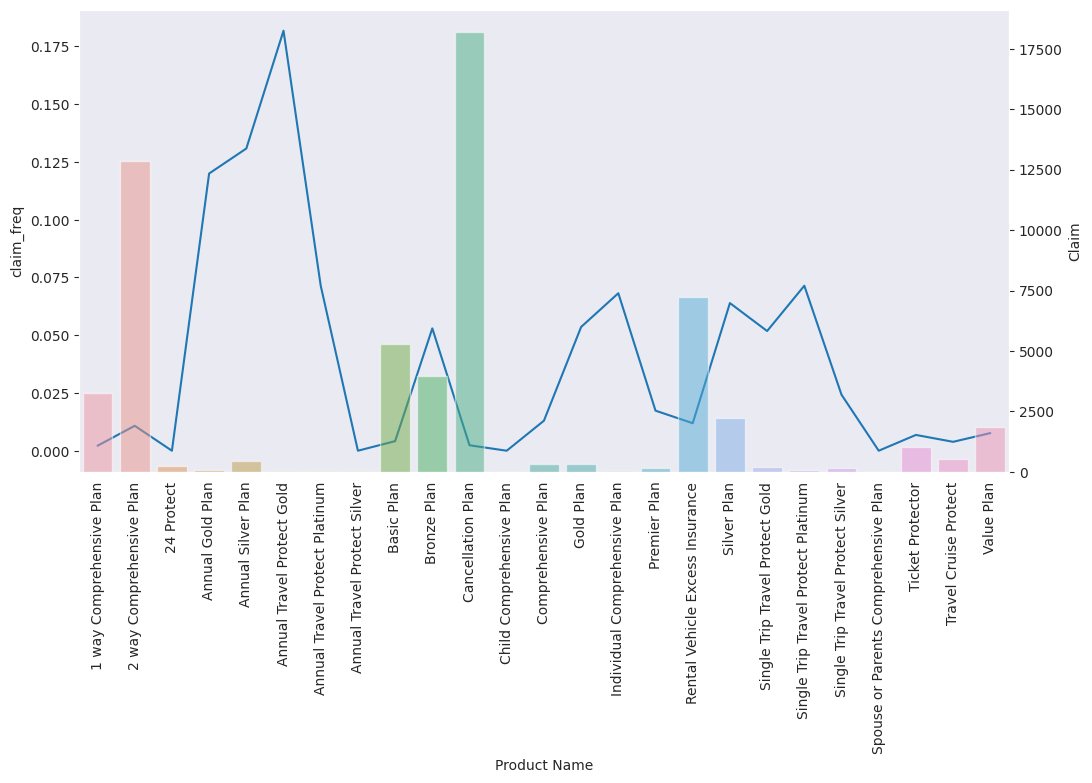

In [69]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
sns.lineplot(data=one_way, x=one_way.index, y='claim_freq', ax=ax1)
sns.barplot(data=one_way, x=one_way.index, y='Claim', alpha=0.5, ax=ax2)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

In [70]:
one_way

,claim_count,Claim,claim_freq
Product Name,,,
1 way Comprehensive Plan,7,3259,0.002148
2 way Comprehensive Plan,139,12874,0.010797
24 Protect,0,233,0.000000
Annual Gold Plan,9,75,0.120000
Annual Silver Plan,59,451,0.130820
Annual Travel Protect Gold,4,22,0.181818
Annual Travel Protect Platinum,1,14,0.071429
Annual Travel Protect Silver,0,14,0.000000
Basic Plan,22,5305,0.004147
